In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 


In [3]:
np.random.seed(101) 
tf.set_random_seed(101) 


In [4]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points 


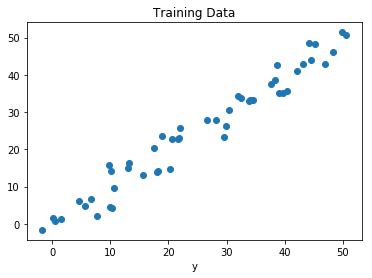

In [5]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


In [6]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [7]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [8]:
learning_rate = 0.01
training_epochs = 1000


In [9]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [10]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost = 5.886804 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 5.7912707 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 5.7119675 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 5.6459417 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 5.590799 W = 1.0053328 b = 0.7389357
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455922
Epoch 350 : cost = 5.5057883 W = 1.008947 b = 0.56222
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775345
Epoch 450 : cost = 5.4453845 W = 1.0118302 b = 0.42124167
Epoch 500 : cost = 5.421903 W = 1.0130452 b = 0.36183488
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.30877414
Epoch 600 : cost = 5.3848577 W = 1.0150996 b = 0.26138115
Epoch 650 : cost = 5.3702464 W = 1.0159653 b = 0.21905091
Epoch 700 : cost = 5.3577 W = 1.0167387 b = 0.18124212
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747244
Epoch 800 : cost = 5.3375573 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294764 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W = 1

In [11]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561663 



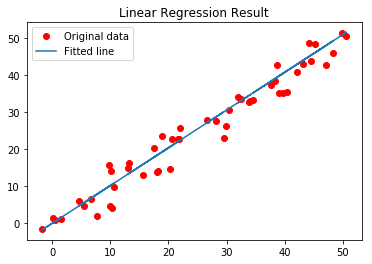

In [12]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
